In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os


import matplotlib.pyplot as plt

In [2]:
fig_dir = './Figures/DAS/HighFrequency'


In [3]:
def read_then_bigplot(datapath, drop_title, fig_dir, Fs=400.641, start_time=0, dur=1, tsamps_per_row=401):

    # start_time = 0
    # dur = 1
    # tsamps_per_row = 401
    tsamps_desired = (Fs * dur)
    rows_required = np.ceil(tsamps_desired/tsamps_per_row).astype('int')
    skiprows = np.floor((Fs * start_time)/tsamps_per_row).astype('int')
    print(skiprows, rows_required)

    max_rows = rows_required
    
    w1_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_1_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w2_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_2_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w3_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_3_time.csv'), delimiter=',',
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w4_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_4_time.csv'), delimiter=',',
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w5_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_5_time.csv'), delimiter=',',
                                   max_rows=max_rows, skiprows=skiprows))[1]
    
    w6_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_6_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w7_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_7_time.csv'), delimiter=',',
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w8_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_8_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w9_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_9_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w10_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_10_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    
    w11_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_11_time.csv'), delimiter=',',
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w12_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_12_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w13_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_13_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w14_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_14_time.csv'), delimiter=',', 
                                   max_rows=max_rows, skiprows=skiprows))[1]
    w15_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_15_time.csv'), delimiter=',',
                                   max_rows=max_rows, skiprows=skiprows))[1]

    
    data_list = [[w1_data,  w2_data,  w3_data,  w4_data,  w5_data],
                 [w6_data,  w7_data,  w8_data,  w9_data,  w10_data],
                 [w11_data, w12_data, w13_data, w14_data, w15_data],
                ]
    wrap_names = [['wrap %i'%i for i in range(1,6)],['wrap %i'%i for i in range(6,11)],['wrap %i'%i for i in range(11,16)],
                 ]

    print(len(w1_data))
    dt = 1/Fs
    t = np.arange(0,len(w1_data)*dt,dt) + start_time

    if len(t)!=len(w1_data):
        print(len(w1_data), len(t))
        t = t[:len(w1_data)]
    fig,axs = plt.subplots(5,3, figsize=[15,7], sharex=True)
    for i in range(5):
        for j in range(3):
            try:
                axs[i,j].plot(t,data_list[j][i])
                axs[i,j].set_title(wrap_names[j][i])
                axs[i,j].set_ylim([-1*np.max(data_list[j][i]),np.max(data_list[j][i])])
            except: pass
    for ax in axs[4]: ax.set_xlabel('Time (s)'), ax.set_xlim([min(t),max(t)])
    fig.suptitle(drop_title,fontsize=24, fontweight='bold')
    fig.tight_layout()
    fig.savefig(os.path.join(fig_dir,'overview_%s.png'%drop_title))

    fig,axs = plt.subplots(3,1, figsize=[15,9], sharex=True)
    # for ax in axs: ax.axvline(91.777, c='k', ls=':')
    for i in range(5):
        for j in range(3):
            try:
                axs[j].plot(t,(0.1*i)+data_list[j][i])
            except: pass
    axs[2].set_xlabel('Time (s)'), axs[2].set_xlim([min(t),max(t)])
    fig.suptitle(drop_title,fontsize=24, fontweight='bold')
    fig.tight_layout()
    # fig.savefig(os.path.join(fig_dir,'overlay_%s.png'%drop_title))

In [4]:
def DAS_to_2D(origdata):
    # print(origdata.shape[1])
    data_3D = origdata.reshape([origdata.shape[0],origdata.shape[1]//3,3])
    data_3D = data_3D.transpose([2,0,1])
    data_2D = data_3D.reshape([3,data_3D.shape[1]*data_3D.shape[2]])
    return data_2D


In [5]:

def DAS_to_2D(origdata):
    npwin = origdata.shape[1]//3
    print("nwin = ",npwin)
    x0 = origdata[:,:npwin]
    x1 = origdata[:,npwin:2*npwin]
    x2 = origdata[:,2*npwin:]
    return [x0.ravel(), x1.ravel(), x2.ravel()]

18703 37407
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
15000207


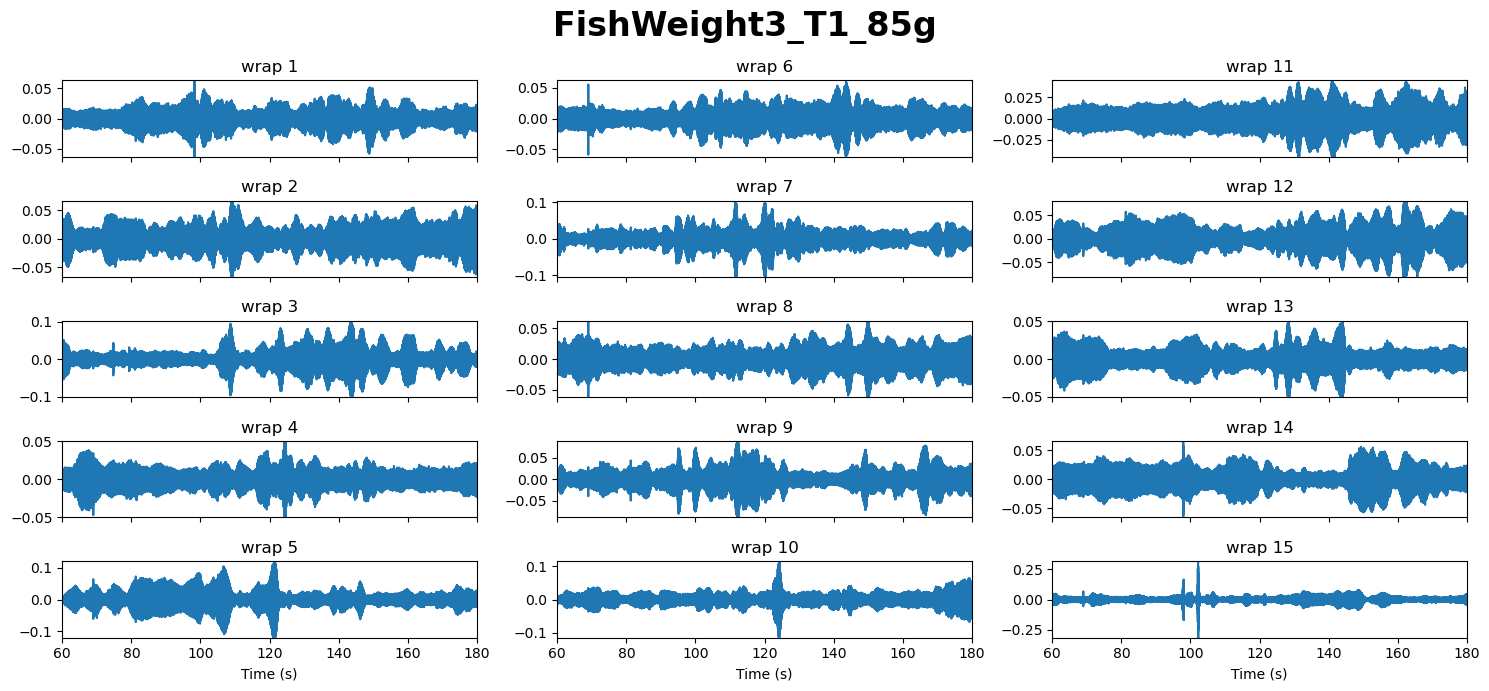

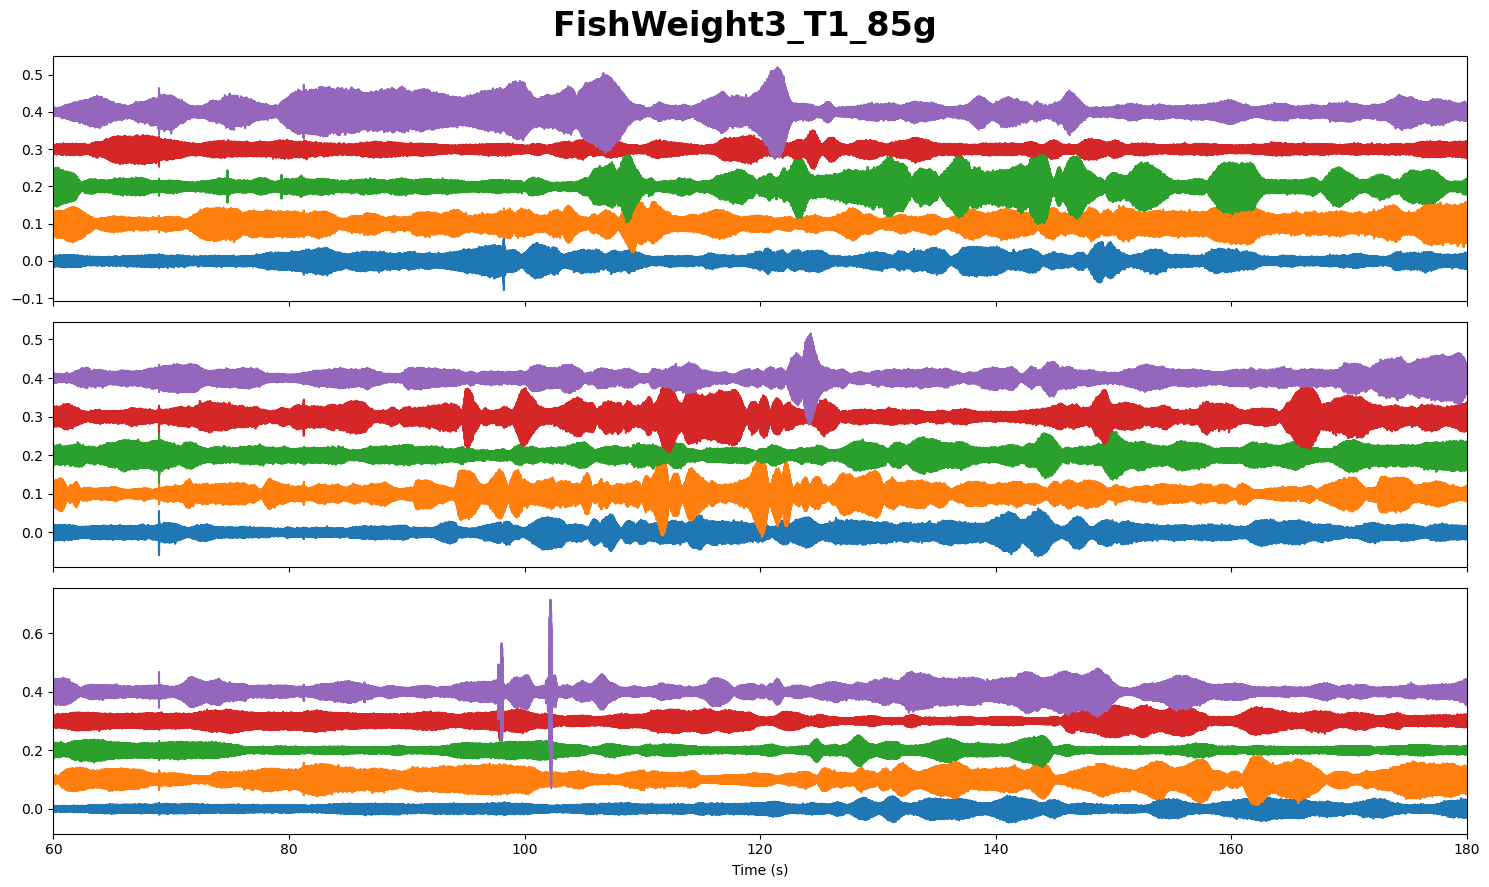

In [7]:
gen_data_dir = '/media/birniece/Extreme SSD/HydraFrac/FromChunHongsHardDrive/High Frequency'
Fs = 125000
# Fs=400.641


drop_title = 'FishWeight3_T1_85g'
datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_2_31_08_PM/Processed data/Processed data')
read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs, start_time=60, dur=120)

# drop_title = 'FishWeight3_T2_85g'
# datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_2_38_36_PM/Processed data/Processed data')
# read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs)

# drop_title = 'Metal_Tube_127g'
# datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_2_53_23_PM/Processed data/Processed data')
# read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs, start_time=115.75, dur=0.5)


# drop_title = 'Metal_Tube_127g_Zoom'
# datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_2_53_23_PM/Processed data/Processed data')
# read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs, start_time=343.99, dur=0.025)

# drop_title = 'FishWeight2_55g'
# datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_3_03_53_PM/Processed data/Processed data')
# read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs, start_time=91.7, dur=10)


# drop_title = 'FishWeight1_29g'
# datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_3_08_14_PM/Processed data/Processed data')
# read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs, start_time=18.5, dur=0.5)


# drop_title = 'WhiteBead_2g'
# datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_3_12_54_PM/Processed data/Processed data')
# read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs)

# drop_title = 'GoldBead_06g'
# datapath = os.path.join(gen_data_dir,'Data_Wednesday_January_31_2024_3_16_27_PM/Processed data/Processed data')
# read_then_bigplot(datapath, drop_title, fig_dir, Fs=Fs)

